<a href="https://colab.research.google.com/github/Bijoya-Sarkar/new/blob/main/dog_and_cat_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [14]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

zip_ref.extractall('/content')

zip_ref.close()


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential  # Correct import
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout


In [17]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
#create cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30, 30, 128)         │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30, 30, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30, 30, 1)           │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,321 (126.25 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 192 (768.00 B)

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2,2)),
    Flatten(),  # ✅ Flatten before Dense
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # ✅ Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # ✅ Correct loss function
    metrics=['accuracy']
)

history = model.fit(train_ds, epochs=10, validation_data=validation_ds)



Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.6153 - loss: 2.1430 - val_accuracy: 0.7166 - val_loss: 0.5540
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - accuracy: 0.7525 - loss: 0.5068 - val_accuracy: 0.7262 - val_loss: 0.5540
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8356 - loss: 0.3695 - val_accuracy: 0.7310 - val_loss: 0.6164
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9066 - loss: 0.2284 - val_accuracy: 0.7264 - val_loss: 0.7580
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9565 - loss: 0.1306 - val_accuracy: 0.7112 - val_loss: 0.9742
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.9713 - loss: 0.0917 - val_accuracy: 0.7050 - val_loss: 1.0891
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 61ms/step - accuracy: 0.9784 - loss: 0.0696 - val_accuracy: 0.7092 - val_loss: 1.1577
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9783 - loss: 0.0726 - 

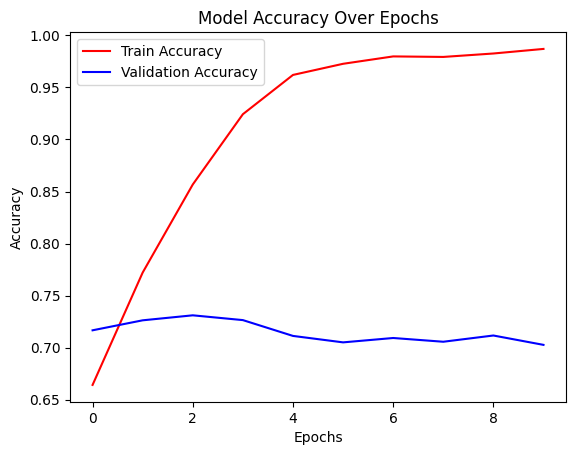

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.show()







In [24]:
import cv2

In [31]:
test_img = cv2.imread('/content/dog.jpg')


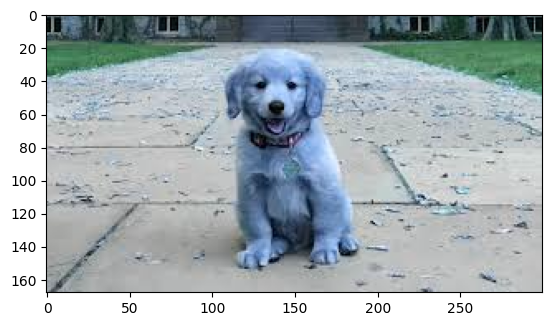

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape

(168, 300, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input=test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[1.]], dtype=float32)